<a href="https://colab.research.google.com/github/rahul9b87/First-repo/blob/main/Prerequesties_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


In [17]:

# Multiplication: For each digit in the output matrix, we have to multiply k times.
#                 total mutiplies = k * (total elements)
#                                 = k * m * n
# Additions: we have to add all k multiplication for each element
#             additions to add k elements = k-1
#             total addtions = (k-1) * m * n


# Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import time as t

def Matrix_Multiply(A, B):
    n = len(A)
    k = len(A[0])
    m= len(B[0])
    C = [[0]*m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]

    print(C)

A = [[1, 2, 3],
    [4, 5, 6]]

B = [[7, 8, 9, 10],
    [11, 12, 13, 14],
    [15, 16, 17, 18]]

t1 = t.time()
Matrix_Multiply(A,B)
t2 = t.time()
time_list = t2-t1

print(f"Time taken by Matrix Multiply is {time_list : .10f}")

[[74, 80, 86, 92], [173, 188, 203, 218]]
Time taken by Matrix Multiply is  0.0010058880


In [ ]:
import numpy as np
A = np.array(A)
B= np.array(B)

t1 = t.time()
C = np.dot(A,B)
t2 = t.time()
time_np = t2-t1

print(f"Time taken by Matrix Multiply is {time_np : .10f}")

Time taken by Matrix Multiply is  0.0010013580


In [ ]:
if time_list< time_np:
    print("List is Faster")
else:
    print("Numpy is Faster")

Numpy is Faster


# Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

If we use the same method, time complexity = n*(n+1)/2 = O(n*2)

In [16]:
import time as t
import numpy as np

def Merge(a, b):
    i = j = k = 0
    c = [0] * (len(a) + len(b))
    while i < len(a) and j < len(b):
        if a[i] <= b[j]:
            c[k] = a[i]
            i += 1
        else:
            c[k] = b[j]
            j += 1
        k += 1

    while i < len(a):
        c[k] = a[i]
        i += 1
        k += 1
    while j < len(b):
        c[k] = b[j]
        j += 1;k += 1
    return c

def Mergesort(a):
    if len(a) == 1:
        return a  # Fix: return a list containing the single element
    mid = len(a) // 2
    al = Mergesort(a[:mid])
    ar = Mergesort(a[mid:])
    return Merge(al, ar)

list_1 = [1, 6, 9, 3, 55, 6, 33, 4, 77, 54, 3]
t1= t.time()
l = Mergesort(list_1)
if len(l)%2 ==0:
  median = (l[len(l)//2]+ l[(len(l)//2)+1])/2
else:
  median = l[(len(l)+1)//2]
t2 = t.time()
t_mergeshort = t2-t1

t1 = t.time()
median_np = np.median(np.array(l))
t2 = t.time()
t_np = t2 - t1

print("t_mergeshort: ", t_mergeshort)
print("T_np: ", t_np)

if t_mergeshort < t_np:
  print("Mergeshort is faster")
else:
  print("Numpy is Faster")

t_mergeshort:  0.0002942085266113281
T_np:  0.0003669261932373047
Mergeshort is faster


# Q4. What is the gradient of the following function with respect to x and y?
(x**2)*y + (y**3)*sin(x)



In [ ]:
# df/dx = 2xy + (y**3)cos(x)

# df/dy = x**2 + 3(y**2)sin(x)

# Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

grad_f = grad(f, argnums=(0, 1)) # compute the gradient with respect to both argumetns x and y;

jax_grad = grad_f(2.0,5.0) #require floating point numbers
print(jax_grad)

(Array(-32.018356, dtype=float32, weak_type=True), Array(72.1973, dtype=float32, weak_type=True))


In [ ]:
df_dx = (2 * 2) * 5 + (5**3) * np.cos(2)
df_dy = 2**2 + 3 * (5**2) * np.sin(2)
print("df/dx:", df_dx)
print("df/dy:", df_dy)

df/dx: -32.0183545683928
df/dy: 72.19730701192613


# Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [10]:
import sympy as sp

x, y = sp.symbols('x y')

f = (x**2)*y + (y**3)*sp.sin(x)

grad = [sp.diff(f, var) for var in (x, y)]

gradient = [expr.evalf(subs={x: 2, y: 5}) for expr in grad]
print(gradient)

[-32.0183545683928, 72.1973070119261]


# Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


In [ ]:
Students_Records ={
    2022:{
        "Batch_1":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
        "Batch_2":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
    },
    2023:{
        "Batch_1":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
        "Batch_2":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
    },
    2024:{
        "Batch_1":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
        "Batch_2":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
    },
    2025:{
        "Batch_1":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
        "Batch_2":{"Roll_No":1,
                  "Name":"N",
                  "Marks":{"Math":100, "English": 70}},
    }
}

# Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)



# Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.





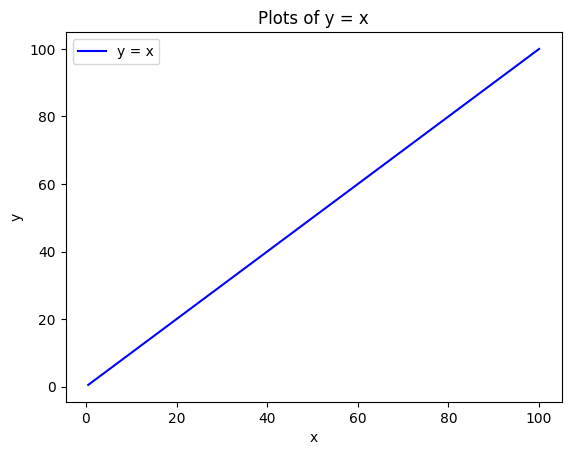

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x
plt.plot(x, y1, label='y = x', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = x')
plt.legend()
plt.show()

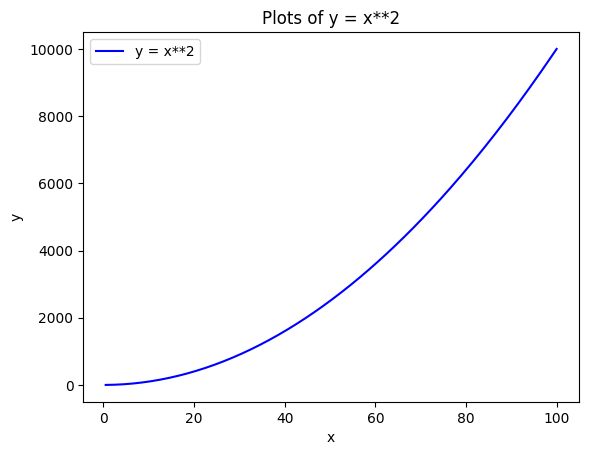

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = x**2
plt.plot(x, y1, label='y = x**2', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = x**2')
plt.legend()
plt.show()

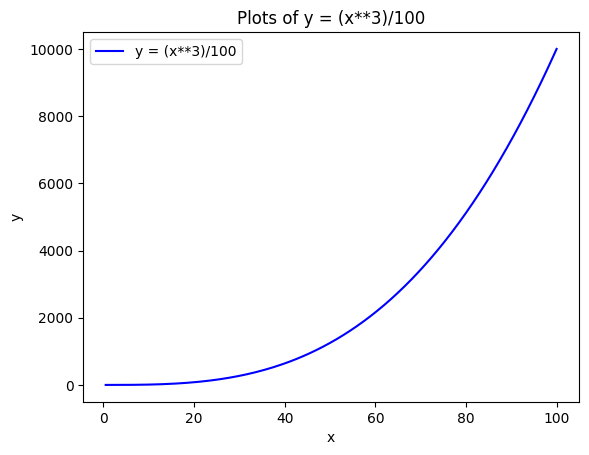

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = (x**3)/100
plt.plot(x, y1, label='y = (x**3)/100', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = (x**3)/100')
plt.legend()
plt.show()

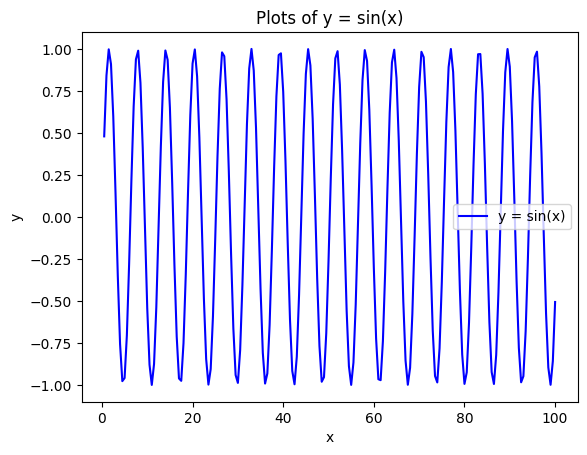

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = np.sin(x)
plt.plot(x, y1, label='y = sin(x)', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = sin(x)')
plt.legend()
plt.show()

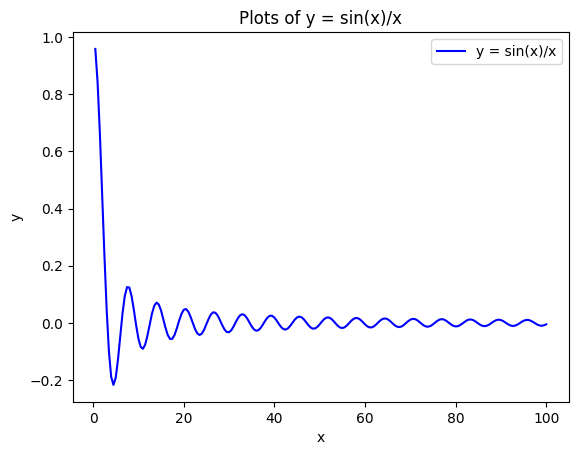

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = np.sin(x)/x
plt.plot(x, y1, label='y = sin(x)/x', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = sin(x)/x')
plt.legend()
plt.show()

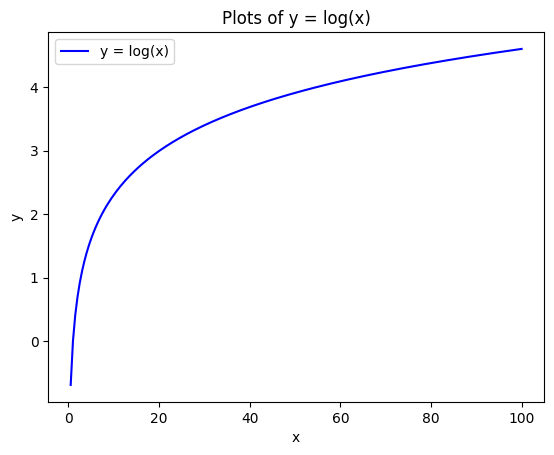

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = np.log(x)
plt.plot(x, y1, label='y = log(x)', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = log(x)')
plt.legend()
plt.show()

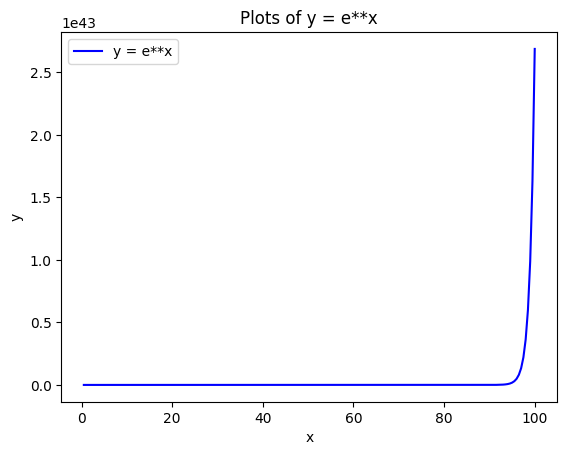

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

y1 = np.exp(x)
plt.plot(x, y1, label='y = e**x', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plots of y = e**x')
plt.legend()
plt.show()

# Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [5]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, (20, 5))

df = pd.DataFrame(matrix, columns=["a", "b", "c", "d", "e"])

max = df.std().idxmax()
min = df.mean(axis=1).idxmin()

print("Max: ", max, "\n Min: ", min)

Max:  a 
 Min:  2


# Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [7]:
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

lt8 = df[df['g'] == 'LT8'].shape[0]

std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

print("Number of rows in the dataframe where the value in the column “g” is “LT8”: ", lt8)
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:  ", std_lt8)
print("Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:  ", std_gt8)

Number of rows in the dataframe where the value in the column “g” is “LT8”:  11
Standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:   0.5287047875684776
Standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:   0.2862907296307878


# Q12. Write a small piece of code to explain broadcasting in numpy.

In [9]:
# Broadcasting in numpy allows arithmetic operations on arrays of different shapes

import numpy as np

a_2d = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

a_1d = np.array([10, 20, 30])

result = a_2d + a_1d

print("2D array:  ",a_2d)
print("\n1D array:   ", a_1d)
print("\nResult of broadcasting and add:   ",result)


2D array:   [[1 2 3]
 [4 5 6]
 [7 8 9]]

1D array:    [10 20 30]

Result of broadcasting and add:    [[11 22 33]
 [14 25 36]
 [17 28 39]]


# Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np
import math
a =[2,4,6,8,212,1,35]

min_index=0
for i in range(1,len(a)):
    if a[i]<a[min_index]:
        min_index = i
print(min_index)

if np.argmin(a)==min_index:
    print("Varified")
else:
    ("Recheck Code")

5
Varified
